In [239]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [240]:
df=pd.read_csv("C:\\Users\\saipr\\Downloads\\quikr_car.csv")

In [241]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [242]:
df.shape

(892, 6)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [244]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

## Quality 
-year has many non-year values 

-year object to int 

-price has Ask for price

-price object to int 

-kms_driven has kms with integers

-kms_driven object to int 

-kms_driven has nan values 

-fuel_type has nan values 

-keep first three words of name
 

## Cleaning

In [245]:
backup=df.copy()

In [246]:
df=df[df['year'].str.isnumeric()]

In [247]:
df['year']=df['year'].astype(int)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


In [249]:
df=df[df['Price']!='Ask For Price']

In [250]:
df['Price']=df['Price'].str.replace(',','').astype(int)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [252]:
df['kms_driven']=df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [253]:
df=df[df['kms_driven'].str.isnumeric()]

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.3+ KB


In [255]:
df['kms_driven']=df['kms_driven'].astype(int)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [257]:
df=df[~df['fuel_type'].isna()]

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [259]:
df['name']=df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [261]:
df.reset_index()

,index,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...,...
811,883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,885,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,888,Tata Zest XM,Tata,2018,260000,27000,Diesel


## Exploratory Data Analysis

In [262]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [264]:
df['name'].value_counts()

name
Maruti Suzuki Swift            51
Maruti Suzuki Alto             42
Maruti Suzuki Wagon            28
Maruti Suzuki Ertiga           16
Hyundai Santro Xing            15
                               ..
Mercedes Benz A                 1
Tata Manza ELAN                 1
Volkswagen Polo Comfortline     1
Nissan Sunny                    1
Tata Zest XM                    1
Name: count, Length: 254, dtype: int64

<Axes: ylabel='Density'>

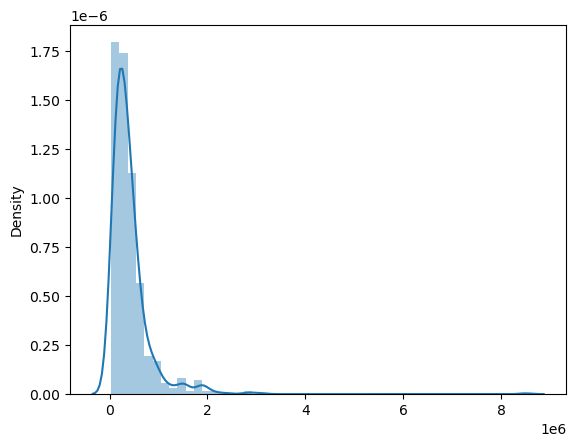

In [265]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(x=df['Price'])

In [266]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

<Axes: ylabel='Density'>

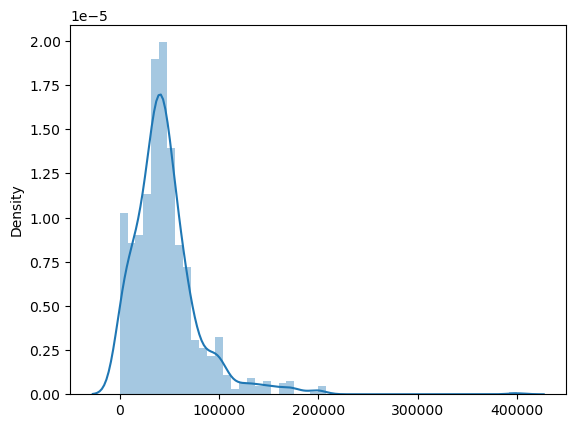

In [267]:
sns.distplot(x=df['kms_driven'])

In [268]:
df['year'].value_counts()

year
2015    111
2013     94
2014     92
2012     75
2016     74
2011     59
2009     54
2017     53
2010     43
2018     30
2006     22
2007     19
2019     18
2008     16
2005     13
2003     13
2004     12
2000      7
2001      5
2002      4
1995      2
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='count'>

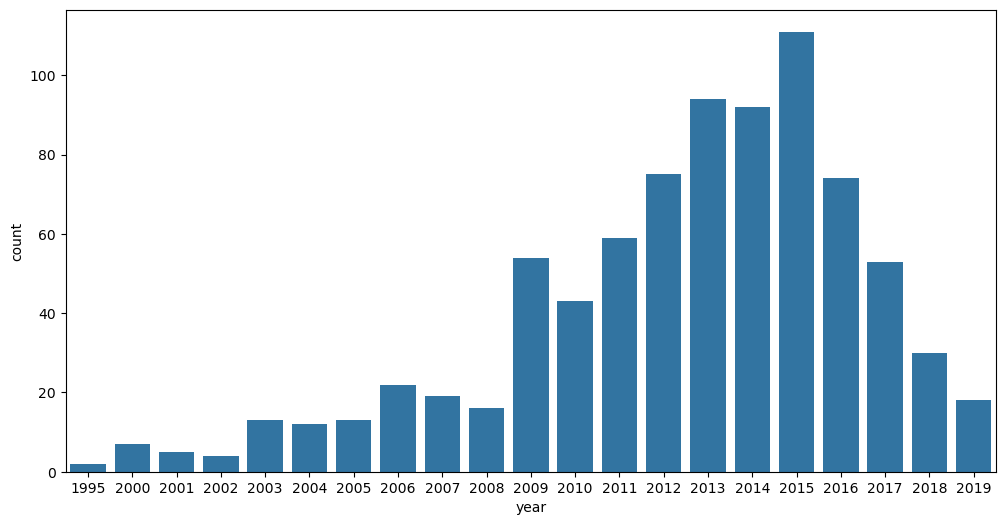

In [269]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['year'])

<Axes: xlabel='fuel_type', ylabel='count'>

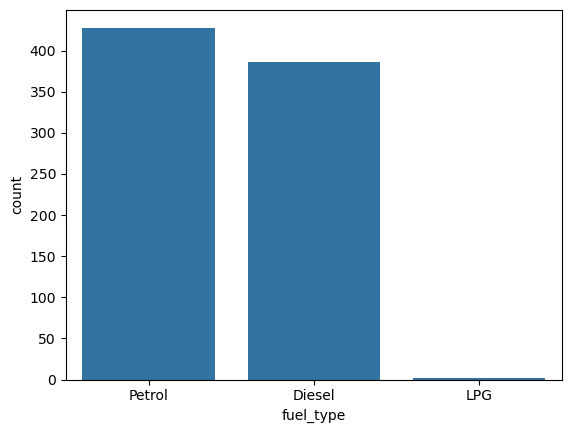

In [270]:
sns.countplot(x=df['fuel_type'])

<Axes: xlabel='fuel_type', ylabel='Price'>

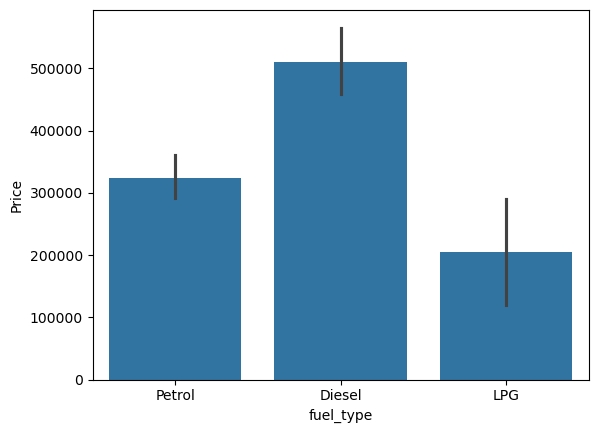

In [271]:

sns.barplot(x=df['fuel_type'],y=df['Price'])

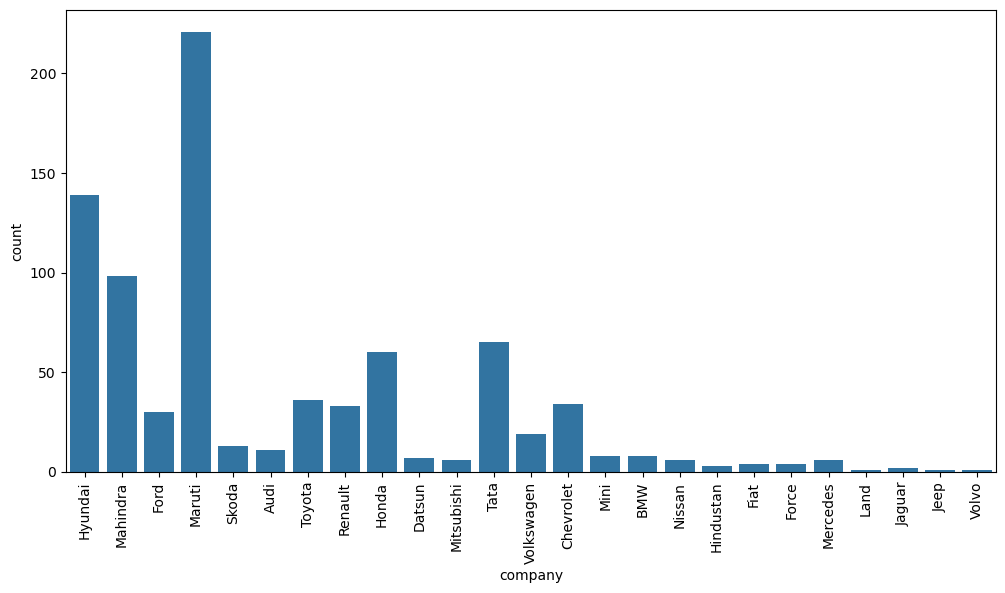

In [272]:
plt.figure(figsize=(12,6))

sns.countplot(x=df['company'])
plt.xticks(rotation=90)
plt.show()

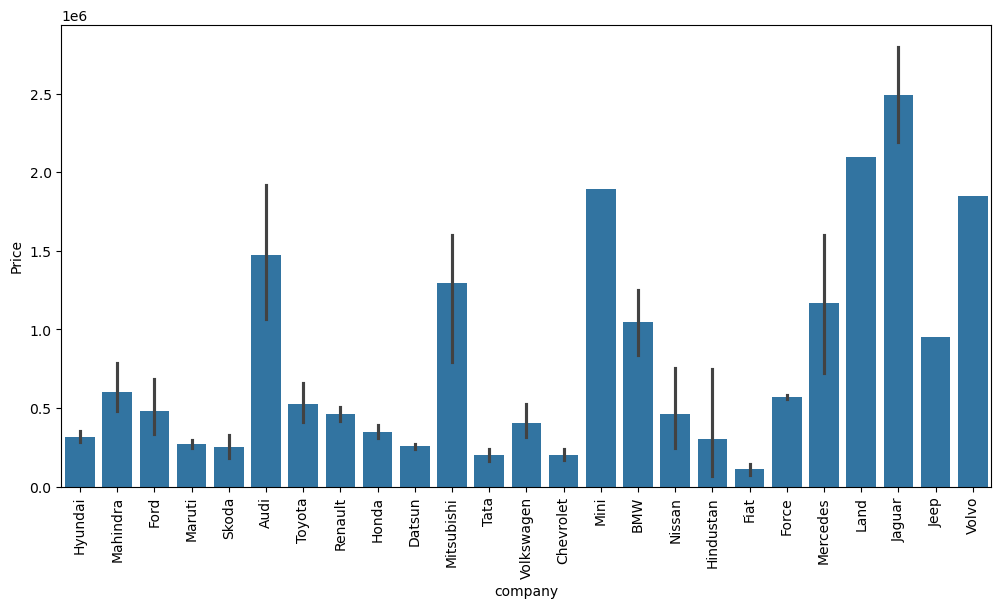

In [273]:
plt.figure(figsize=(12,6))

sns.barplot(x=df['company'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

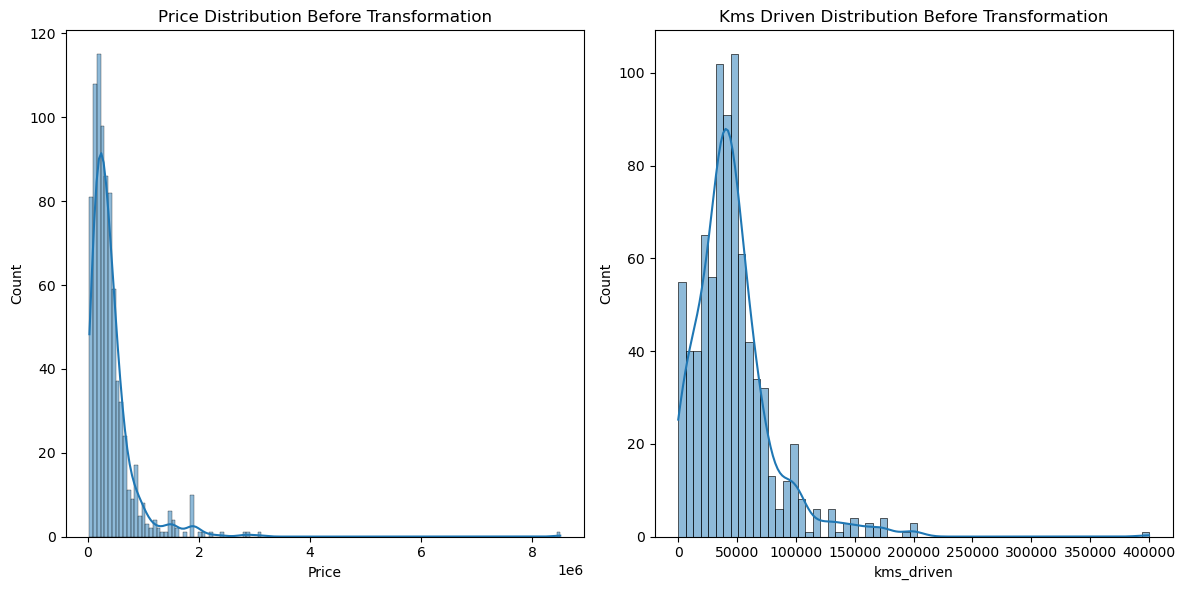

In [274]:
# Plot distribution of 'Price' and 'kms_driven' before transformation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['Price'], kde=True, ax=axes[0])
axes[0].set_title('Price Distribution Before Transformation')

sns.histplot(df['kms_driven'], kde=True, ax=axes[1])
axes[1].set_title('Kms Driven Distribution Before Transformation')

plt.tight_layout()
plt.show()


In [275]:
df=df[df['Price']<6000000].reset_index(drop=True)

In [289]:
df.select_dtypes(include='number').corr()

,year,Price,kms_driven
year,1.000000,0.347764,-0.233699
Price,0.347764,1.000000,-0.149621
kms_driven,-0.233699,-0.149621,1.000000


<Axes: >

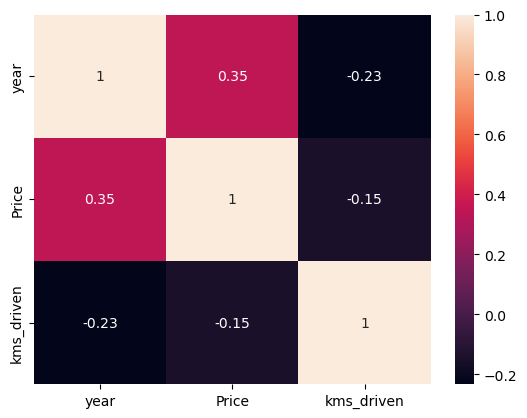

In [291]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

<Axes: xlabel='Price', ylabel='kms_driven'>

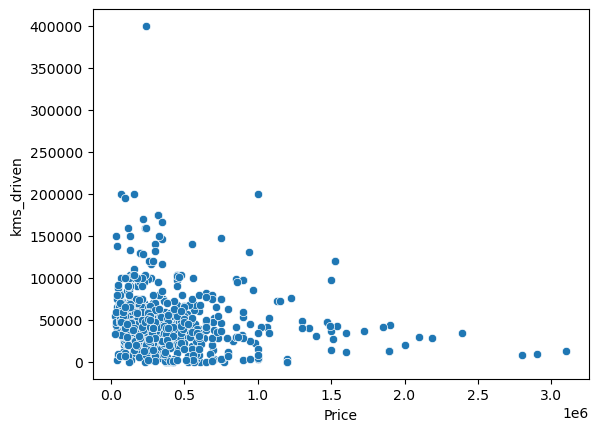

In [293]:
sns.scatterplot(y=df['kms_driven'],x=df['Price'])

<Axes: xlabel='year', ylabel='Price'>

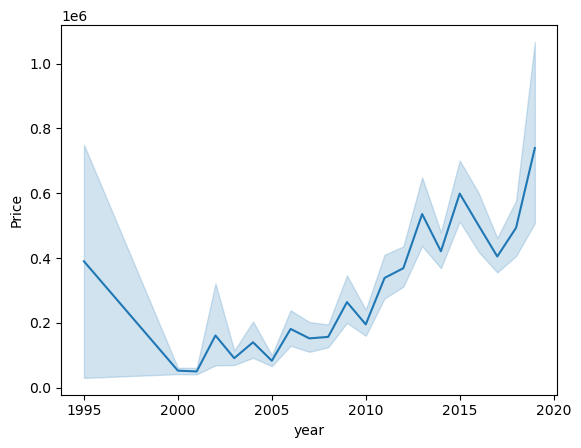

In [295]:

sns.lineplot(x=df['year'],y=df['Price'])

## Model Building

In [339]:
df['year'].min()

1995

In [325]:
X=df.drop('Price',axis=1)
y=df['Price']

In [326]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [327]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor

In [328]:
# Define your categorical columns
categorical_columns = ['name', 'company', 'fuel_type']

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Ignore unknown categories during encoding
])

# Combine all preprocessing steps in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', categorical_transformer, categorical_columns),
    ])

# Create a pipeline that first preprocesses the data, then applies the classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),         
    ('regressor', LinearRegression())      
])




In [329]:
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('regressor', LinearRegression())])

In [330]:
y_pred = model_pipeline.predict(X_test)


In [331]:
# Evaluate the model
print("R_2:", r2_score(y_test, y_pred))
print("MSE:\n", mean_squared_error(y_test, y_pred))


R_2: 0.618668449718448
MSE:
 62632831560.457596


In [332]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    gbr=LinearRegression()
    model_pipeline.fit(X_train, y_train)
    y_pred=model_pipeline.predict(X_test)
    scores.append(r2_score(y_test,y_pred))


In [333]:
np.argmax(scores)

124

In [334]:
scores[np.argmax(scores)]

0.8480692458903833

In [335]:
# Create a function for making predictions
def predict_price(car_name, company, year, kms_driven, fuel_type):
    # Prepare the input data as a DataFrame
    input_data = pd.DataFrame({
        'name': [car_name],
        'company': [company],
        'year': [year],
        'kms_driven': [kms_driven],
        'fuel_type': [fuel_type]
    })
    
    # Predict the price using the trained model
    predicted_price = model_pipeline.predict(input_data)
    return predicted_price[0]  # Return the predicted price

# Example: Make a prediction
car_name = "Hyundai Grand i10"
company = "Hyundai"
year = 2014
kms_driven = 30000
fuel_type = "Petrol"

predicted_price = predict_price(car_name, company, year, kms_driven, fuel_type)
print(f"Predicted price for {car_name}: ₹{predicted_price:.2f}")

Predicted price for Hyundai Grand i10: ₹388750.40


In [336]:
import joblib

# Save the trained model to a file
joblib.dump(model_pipeline, 'model.pkl')


['model.pkl']